# <span style='color:red'> EDA, FE and Logistic Regression Model (Algerian Forest Fires Dataset) </span>

 __<span style='color:red'> 1. EDA and FE </span>__

1.Data Profiling

2.Stastical analysis

3.Graphical Analysis

4.Data Cleaning

5.Data Scaling

__<span style='color:red'> 2. Logistic Regression Model (Classification) </span>__

1.Logistic Regression Model

2.Performance metrics for above model

3.Creating Imbalanced dataset

4.Balancing dataset using imbalanced library

5.EDA on balanced dataset

6.New Logistic Regression Model for Imbalanced dataset

7.Performance metrics for new model

8.Performance comparison for both models


Dataset: https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#

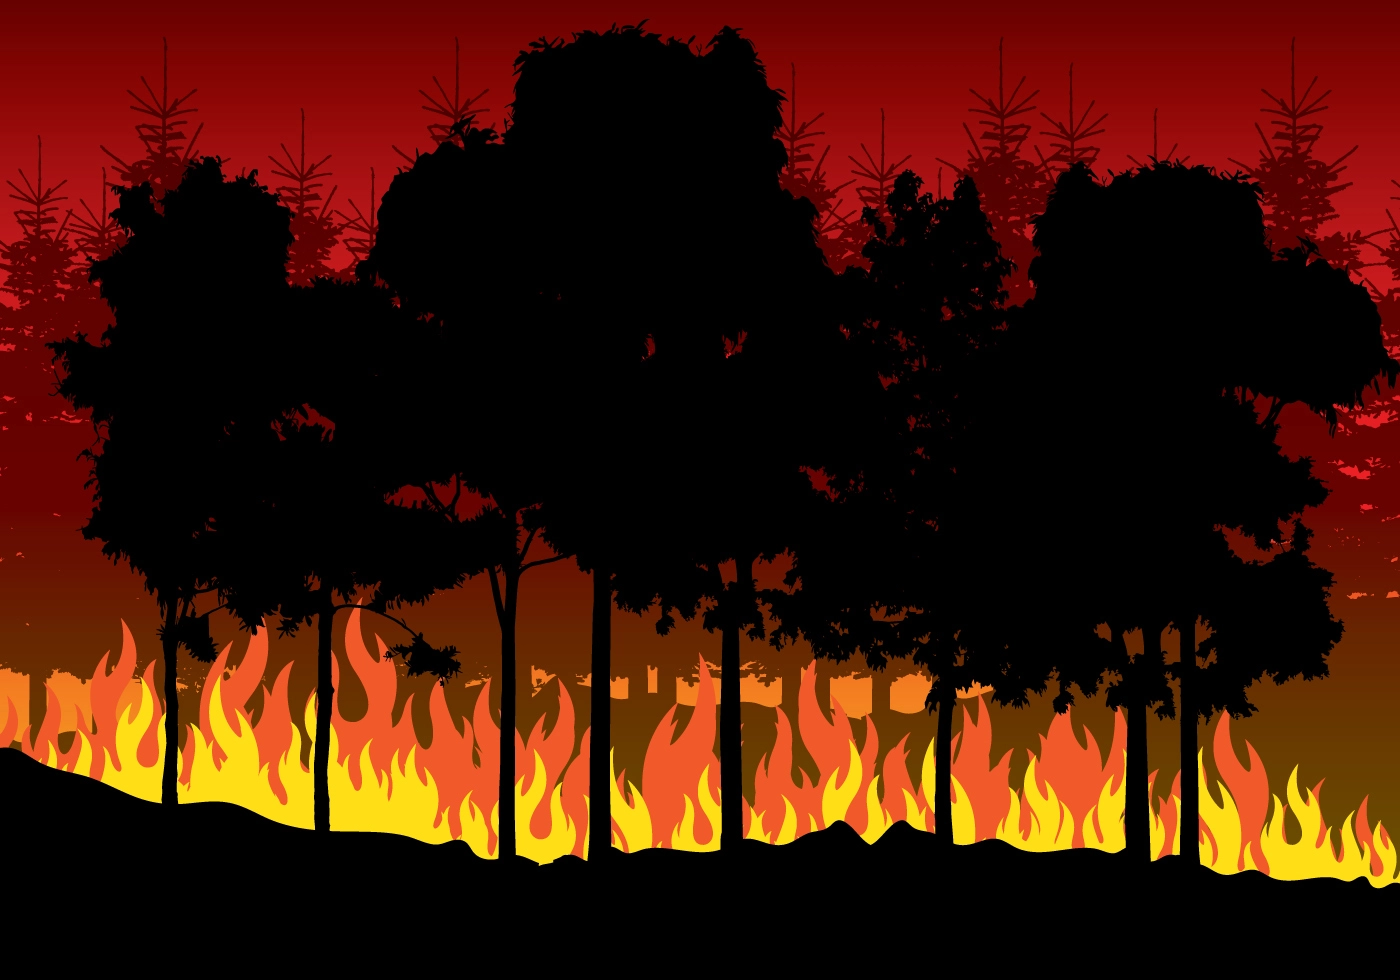

In [4]:
from IPython import display
display.Image('Desktop/Datasets/forrestfire.png')

# <span style='color:red'> 1.0 Importing required libraries </span>

In [177]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## For Q-Q Plot
import scipy.stats as stats

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Machine Learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

### To be able to see maximum columns on screen
pd.set_option('display.max_columns',500)

### To save the model
import pickle

# <span style='color:red'> 2.0 Importing Dataset and Cleaning the Data </span>

In [105]:
data = pd.read_csv('desktop/Datasets/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [106]:
data.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


__<span style='color:red'> 2.1 Info about dataset and its attributes </span>__

The dataset includes 244 instances that regroup a data of two regions of Algeria, namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
122 instances for each region.

The period from June 2012 to September 2012.

The dataset includes 11 attribues and 1 output attribue (classes)

The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.

__<span style='color:red'> Attributes </span>__

__Date__ : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

__<span style='color:red'>Weather data observations </span>__

__Temp__ : temperature noon (temperature max) in Celsius degrees: 22 to 42
        
__RH__ : Relative Humidity in %: 21 to 90
        
__Ws__ :Wind speed in km/h: 6 to 29
        
__Rain__: total day in mm: 0 to 16.8

__<span style='color:red'>FWI Components </span>__

__Fine Fuel Moisture Code (FFMC) index from the FWI system__: 28.6 to 92.5
    
__Duff Moisture Code (DMC) index from the FWI system__: 1.1 to 65.9
    
__Drought Code (DC) index from the FWI system___: 7 to 220.4
    
__Initial Spread Index (ISI)__ index from the FWI system: 0 to 18.5
    
__Buildup Index (BUI) index__ from the FWI system: 1.1 to 68
    
__Fire Weather Index (FWI)__ Index: 0 to 31.1

__Classes__: two classes, namely fire and not fire


# <span style='color:red'> 2.2 Dropping rows which have no information </span>

In [107]:
#dropping rows having region name and headder
data.drop(index=[122,123,124],inplace=True)
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace= True)

In [108]:
data.iloc[121:].head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire


# <span style='color:red'> 2.3 Creating Region feature </span>

In [109]:
### creating feature called Region 0 for Bejaia region and 1 for Sidi Bel-abbes region
data.loc[:122,'Region']= 0
data.loc[122: ,'Region']= 1

In [110]:
data.iloc[120:].head(6)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0
125,4,6,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,1.0


# <span style='color:red'> 2.4 Datatypes and describe </span>

In [111]:
# here it is visible that all datatypes are in object 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [112]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
day,244,31,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,244,4,7,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,244,1,2012,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,244,19,35,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH,244,62,64,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ws,244,18,14,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain,244,39,0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FFMC,244,173,88.9,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DMC,244,166,7.9,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC,244,198,8,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <span style='color:red'> 2.5 Data Cleaning </span>

In [113]:
# here it is visible that some columns have spaces in the names like RH, Ws
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [114]:
# stripping spaces from column names
data.columns= [col_name.strip() for col_name in data.columns]
data.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [115]:
### converting all feature values to string so that we can do data cleaning as shown below.
data=data.astype(str)

In [116]:
### somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    data[feature]= data[feature].str.replace(" ","")

In [117]:
### index no 165 for feature name FWI has value fire
data[data['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [118]:
### replacing fire value witha float value
data.loc[165,'FWI']=' 0.1'

In [119]:
### replacing nan value wit fire to make data equal to the info given in dataset 
data[data['Classes']== 'nan'].index
data.loc[165,'Classes']='fire'

In [120]:
### encoding classes feature
data['Classes']=data['Classes'].str.replace('notfire','0')
data['Classes']=data['Classes'].str.replace('fire','1')

In [121]:
### Dropping year feature as data is realted to year 2012.
data.drop('year', axis=1, inplace=True)

# <span style='color:red'> 2.6 Changing datatype to Numerical from Object </span>

In [122]:
### changing datatypes of features to numerical for numerical features as all are in object

datatype_convert={'day':'int64', 'month':'int64', 'Temperature':'int64', 'RH':'int64', 'Ws':'int64',
                  'Rain':'float64', 'FFMC':'float64', 'DMC':'float64', 'DC':'float64', 'ISI':'float64', 'BUI':'float64',
                  'FWI':'float64', 'Classes':'int64', 'Region':'float64'}

data=data.astype(datatype_convert)
data.dtypes

day              int64
month            int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

# <span style='color:red'> 2.7 Checking Null values and Duplicates </span>

In [123]:
data.isnull().sum()

day            0
month          0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [124]:
data[data.duplicated()]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


# __<span style='color:green'> Observation </span>__

1.There is no null value in dataset.

2.Total 244 rowws and 15 columns is present.

3.There is no duplicate observation in dataset.

# <span style='color:red'> 3.0 Analysis of Features </span>

# <span style='color:red'> 3.1 Comparing Classes and Region features </span>

In [125]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region 
data_pie = data.groupby(['Classes','Region']).agg({'Classes':['count']})
data_pie

Classes
                 count
Classes Region        
0       0.0         63
        1.0         43
1       0.0         59
        1.0         79

<AxesSubplot:ylabel='count'>

<Figure size 720x576 with 0 Axes>

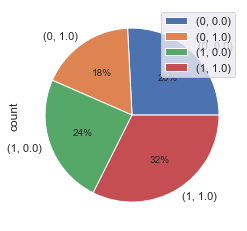

In [126]:
### Plotting Pie chart
### Here 0, 1 is not fire and fire respectively
### Here 0.0 and 1.0 is Bejaia region and Sidi Bel-abbes region respectively

plt.figure(figsize=(10,8))
data_pie.plot(kind= 'pie',autopct='%1.0f%%',y='Classes')

<AxesSubplot:xlabel='Classes', ylabel='count'>

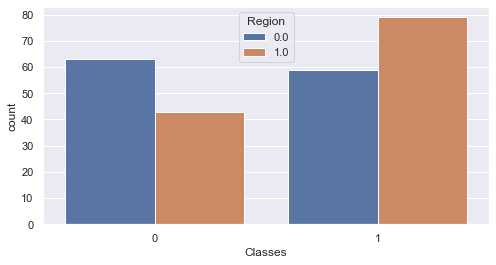

In [127]:
### 0 is not fire and 1 i fire for Classes
### 0 is Bejaia region and 1 is Sidi Bel-abbes region
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='Classes',hue='Region')

# <span style='color:green'> Observation </span>

1.It is evident that Sidi Bel-abbes region has more occurance of fire than Bejaia region.

2.It is also evident that there is more cases of fire than not fire.

# <span style='color:red'> 3.2 Numerical features </span>

In [128]:
### Getting list of numerical features excluding Classes and Region

Numerical_features= [feature for feature in data.columns if feature not in ['Classes','Region']]
print(Numerical_features)

['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


In [129]:
### Getting uniques values in each features
data.nunique()

day             31
month            4
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

# <span style='color:red'> 3.3.0 Discrete Numerical Features </span>

In [130]:
# here the assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be 
# considered continuous feature

Discrete_numerical =[feature for feature in Numerical_features+['Region'] if (len(data[feature].unique())<35)]
print(Discrete_numerical)

['day', 'month', 'Temperature', 'Ws', 'Region']


# <span style='color:red'> 3.3.1 Discrete Numerical Feature vs Target Feature </span>

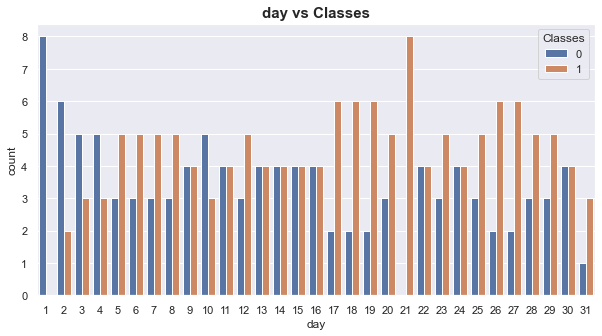

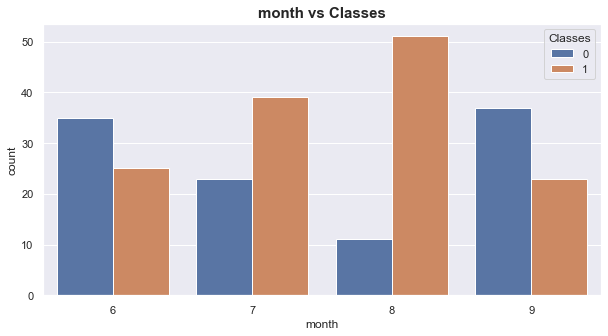

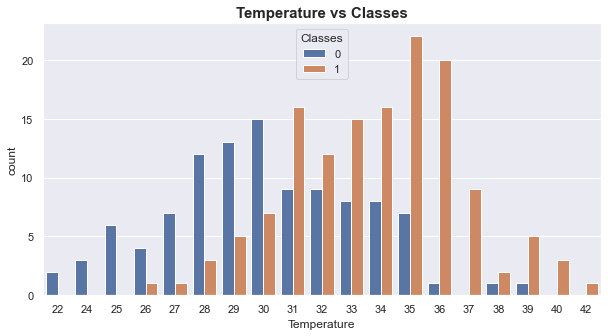

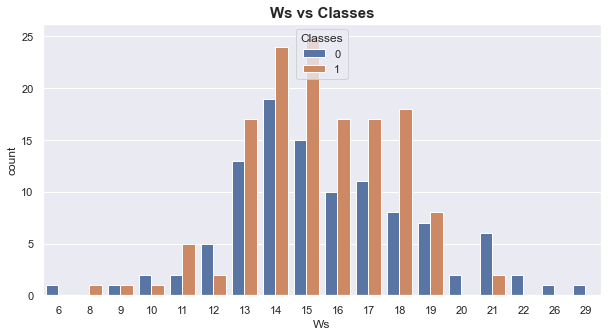

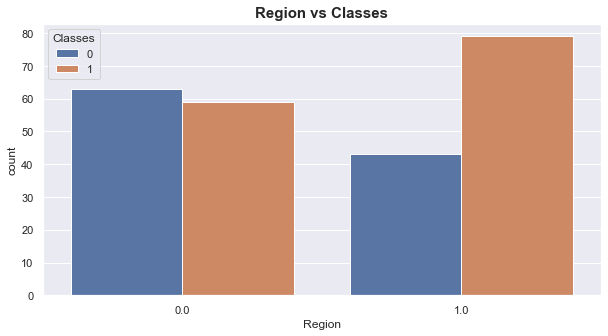

In [131]:
### this is bivariate analysis between target feature classes and discrete numerical features
### for this we plot count plot
for feature in Discrete_numerical:
    sns.set(rc={'figure.figsize':(10,5)})
    sns.countplot(data= data , x=feature, hue='Classes')
    plt.title('{} vs Classes'.format(feature),fontsize=15,fontweight='bold')
    plt.show();

# <span style='color:green'> Observation </span>

1.From day vs Classes plot it is visible that on almost all days the occurance of fire is there, and its count is more than or equal to the count of no fire cases.

2.From month vs Classes plot it is visible that july and august month have more cases of occurance of fire as compared to other two months of june and september where occurance of fire is less as compared to no fire.

3.The month of august has highest no of cases of occurance of fire.

4.Overall cases of occurance of fire is more than the cases of no occurance of fire.

5.From temperature vs Classes plot it is visible that temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.

6.From windspeed vs Classes plot it is visible that for wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.

7.From Region vs Class plot it is visible that in Bejaia region, the no of cases of occurance of fire is less compared to no fire.

8.In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire. Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

9.Most no of fires occured on 21st of the month.

10.Least no of fires occured on 2nd of the month.

11.For most days either fire occured was greater than or equal to no fire occured.

12.Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.

13.July and august have more cases of fire as compared to no fire.

14.June and september have more cases of no fire as compared to fire.

15.In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.

16.In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.

17.Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

# <span style='color:red'> 3.4.0 Continuous Numerical Features </span>

In [132]:
continuous_feature = [feature for feature in Numerical_features if feature not in Discrete_numerical]
print(continuous_feature)

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


# <span style='color:red'> 3.4.1 Distribution of Continuous Numerical Features </span>

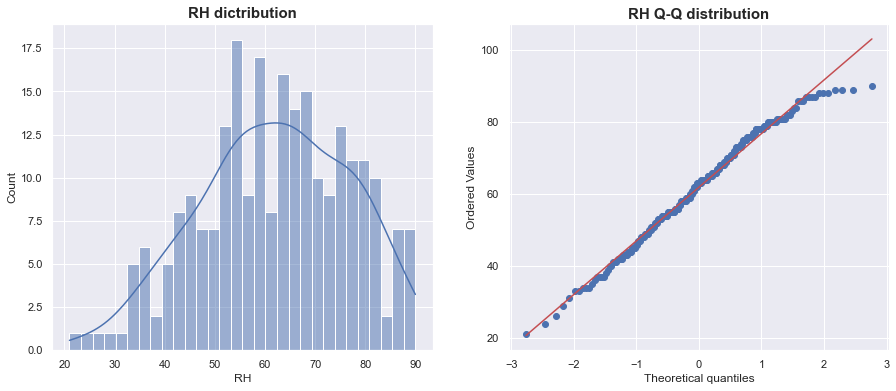

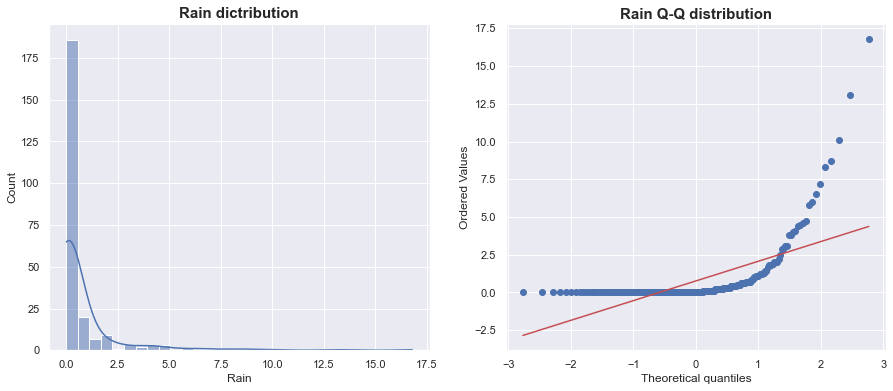

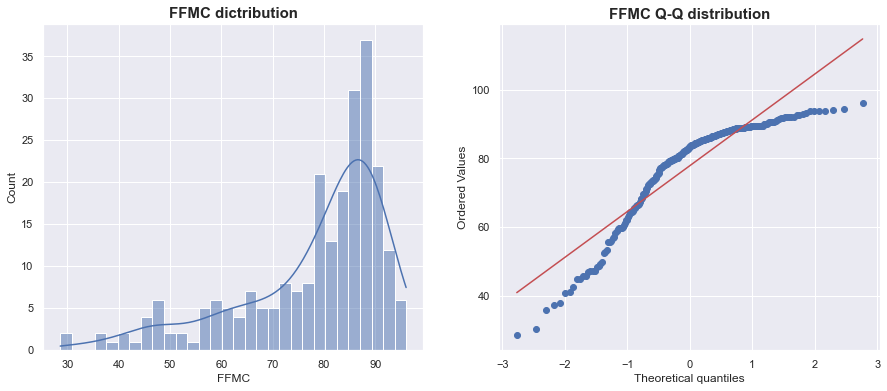

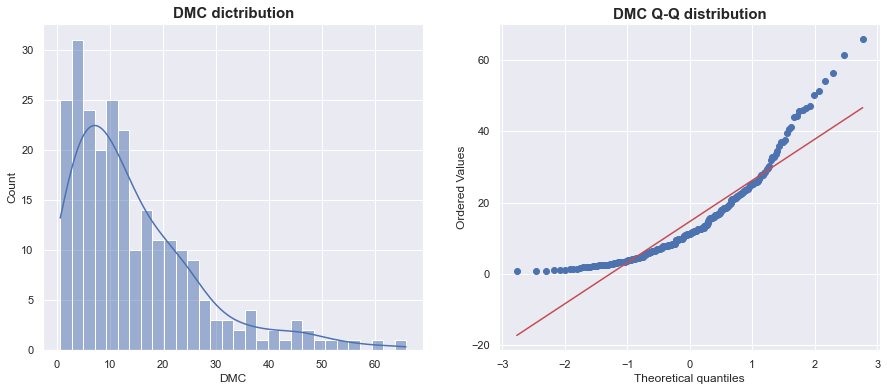

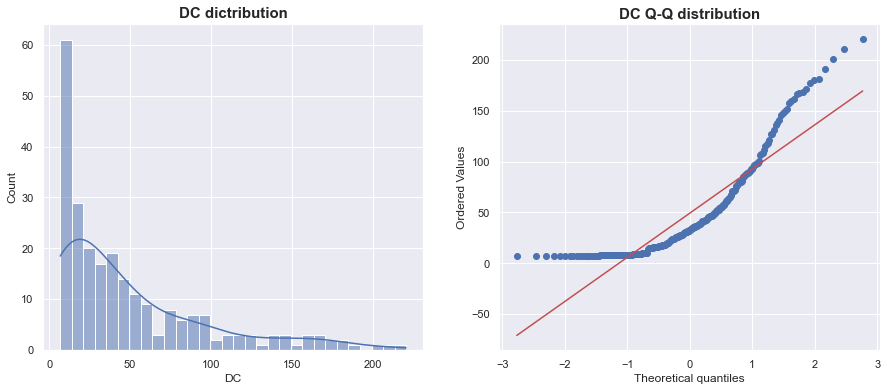

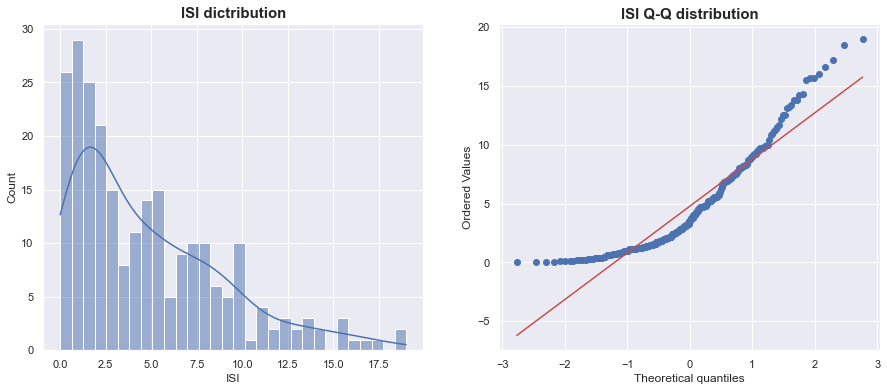

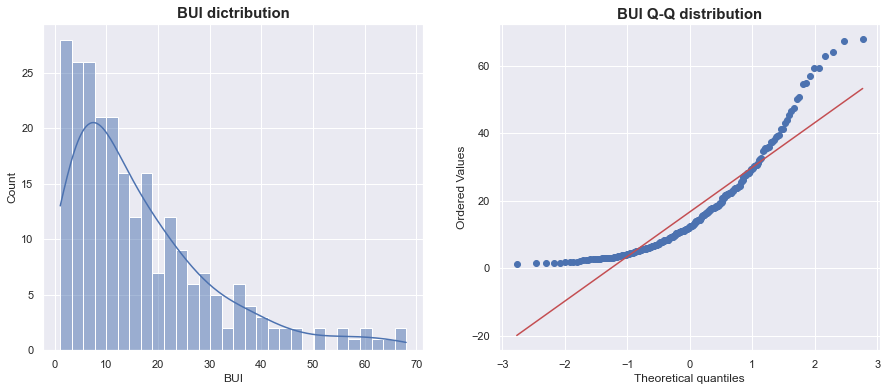

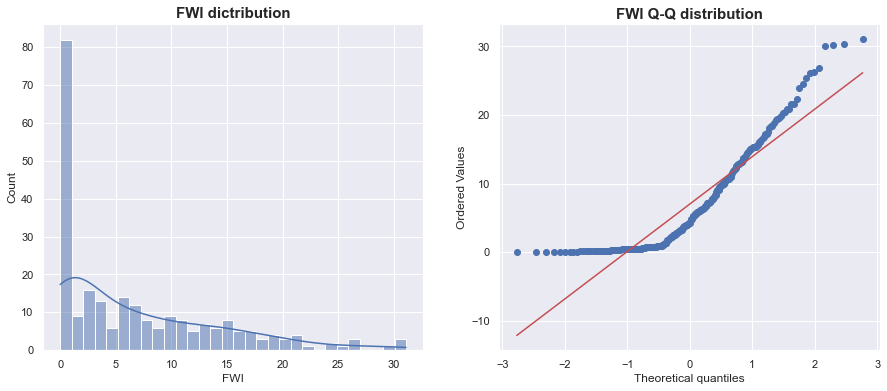

In [133]:
### Checking distribution of Continuous numerical features

for feature in continuous_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data=data, x=feature,kde=True,bins=30)
    plt.title('{} dictribution'.format(feature),fontsize=15,fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(data[feature], dist='norm', plot= plt)
    plt.title('{} Q-Q distribution'.format(feature),fontsize=15,fontweight='bold')
    plt.show();

# <span style='color:green'> Observation </span>

1.Relative humidity is following gaussian distribution.

2.Rain, DMC, DC, ISI, BUI, FWI are following right skewed distribution(Log-Normal distribution).

3.FFMC feature follows left skwed distribution.

# <span style='color:red'> 3.4.2 Comparing Continuous Numerical Features with Region </span>

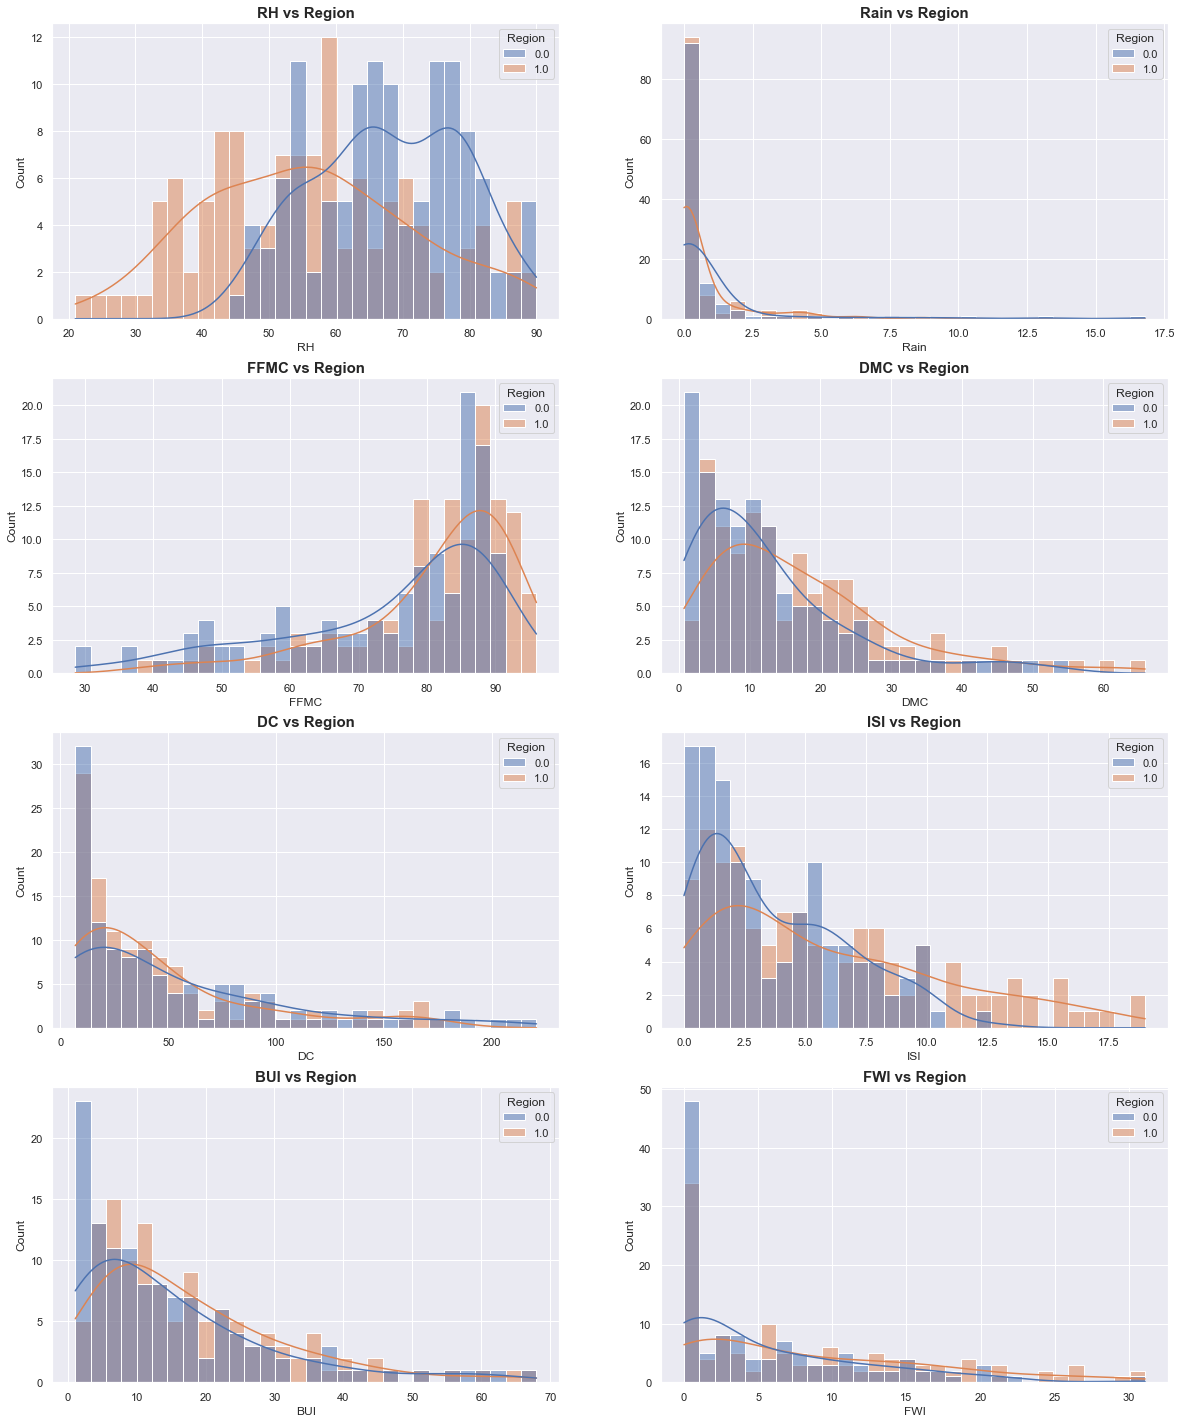

In [134]:
### Comparing Continuous numerical features with Region 
plt.figure(figsize=(20,25))
for feature in enumerate(continuous_feature):
    plt.subplot(4,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=data,x=feature[1],kde=True,bins=30,hue='Region',color='blue')
    plt.title('{} vs Region'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 3.4.3 Comparing Continuous numerical features with Classes </span>

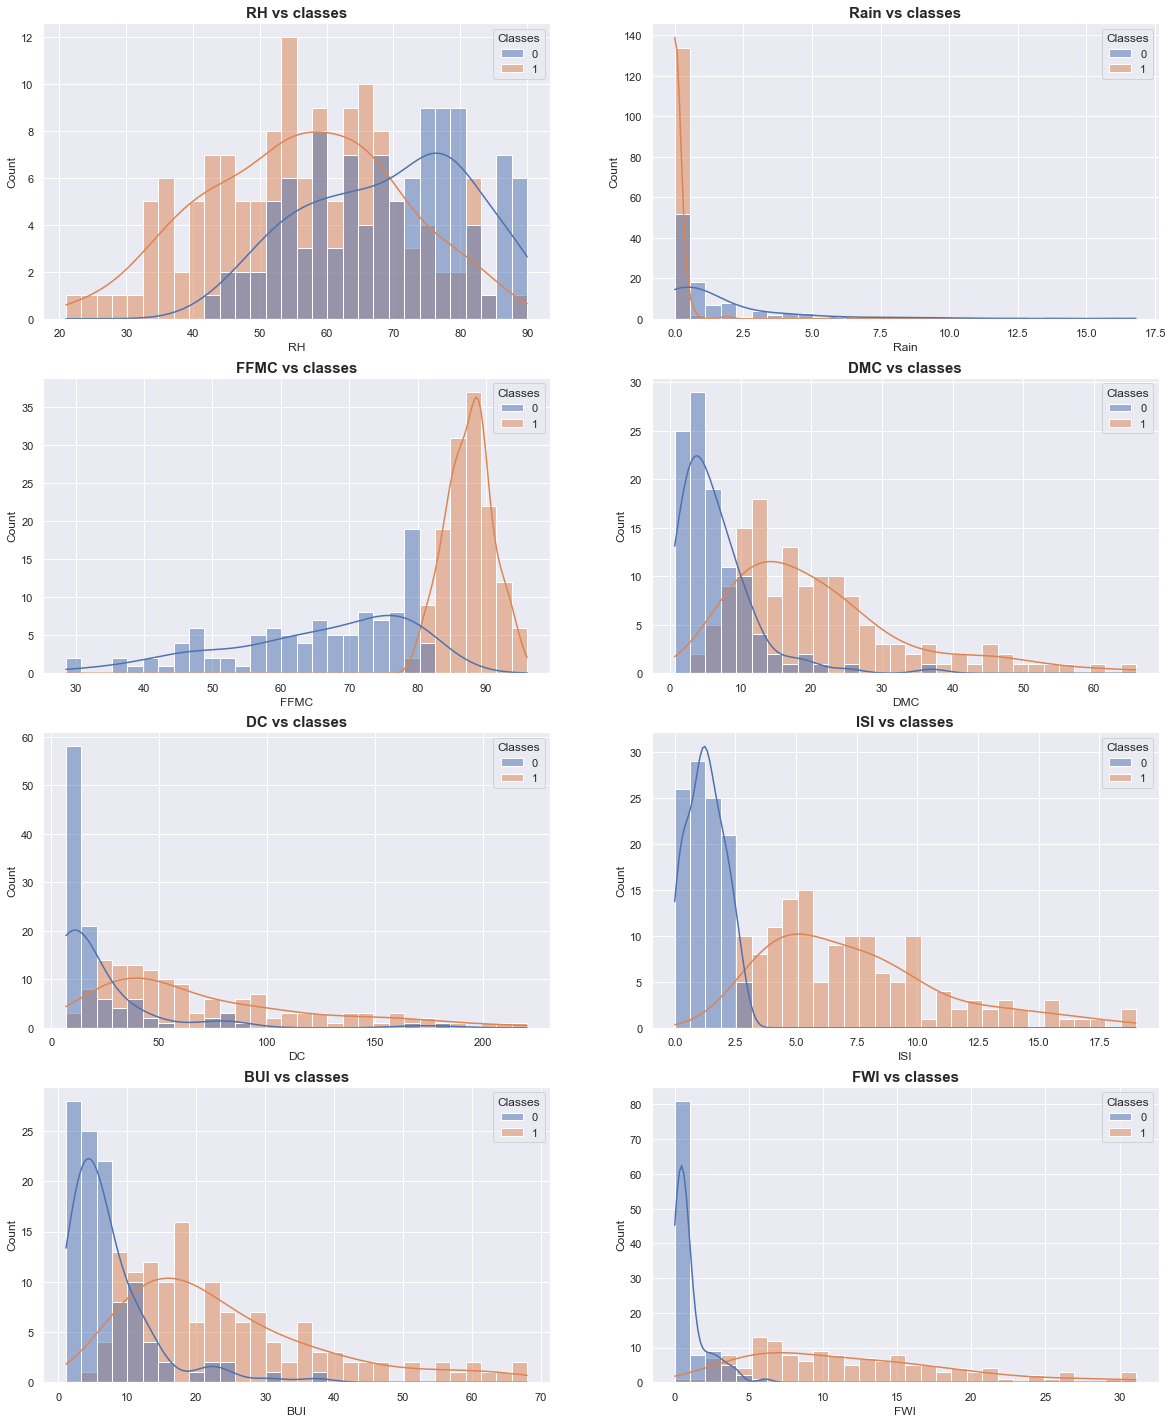

In [135]:
### Comparing Continuous numerical features with Classes
plt.figure(figsize=(20,25))
for feature in enumerate(continuous_feature):
    plt.subplot(4,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(10,6)})
    sns.histplot(data=data,x=feature[1],kde=True,bins=30,color='blue',hue='Classes')
    plt.title('{} vs classes'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:red'> 3.5 Checking Outliers </span>

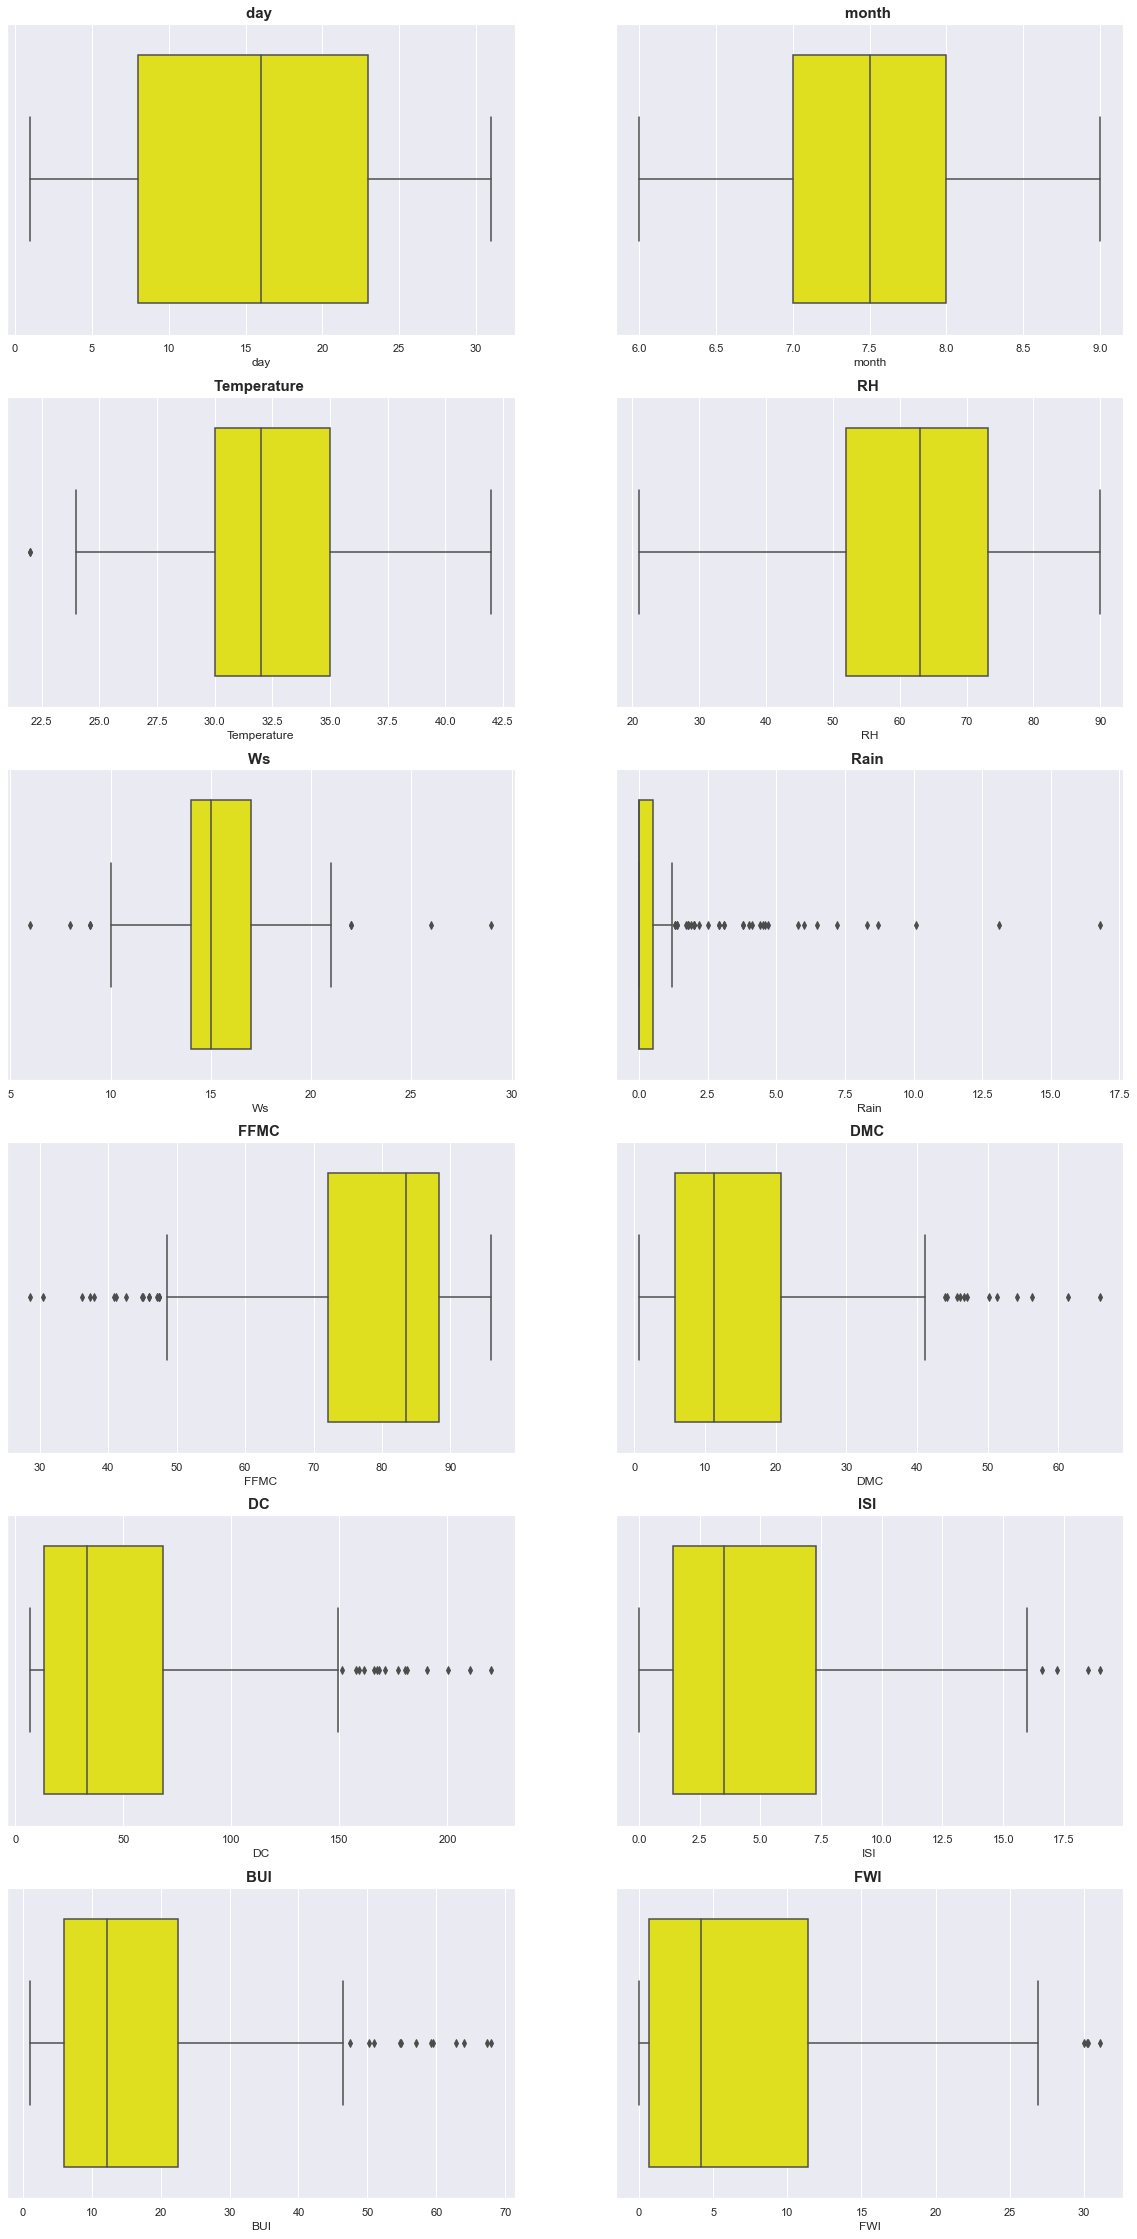

In [136]:
### Checking outliers in numerical features
plt.figure(figsize=(20,40))
for feature in enumerate(Numerical_features):
    plt.subplot(6,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,7)})
    sns.boxplot(data=data,x=feature[1],color='yellow')
    plt.title('{} '.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();
    

# <span style='color:green'> Observation </span>

1.Relative Humidity, RH feature doesnt have outliers.

2.Temperature and FFMC have outliers in lower boundary side.

3.Wind Speed, Ws has outliers on both sides(Upper and lower boundary).

4.Rain, DMC,DC, ISI, BUI and FWI have outilers in upper boundary side.

# <span style='color:red'> 4.0 Correlation between each Numerical features </span>

In [137]:
corr = round(data[Numerical_features+['Classes']].corr(),2)
corr

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
day,1.00,0.00,0.10,-0.07,0.05,-0.11,0.22,0.49,0.53,0.18,0.52,0.35,0.20
month,0.00,1.00,-0.06,-0.04,-0.04,0.04,0.02,0.07,0.13,0.06,0.09,0.08,0.02
Temperature,0.10,-0.06,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.07,-0.04,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,0.05,-0.04,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.11,0.04,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.22,0.02,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.49,0.07,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.53,0.13,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.18,0.06,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74


# <span style='color:red'> 4.1 Heatmap to visualise the Correlation </span>

<AxesSubplot:>

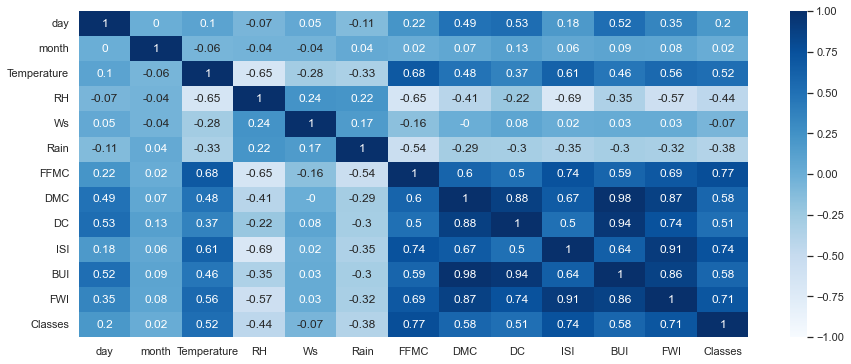

In [138]:
### Plotting heatmap for visualising the correlation between features

sns.set(rc={'figure.figsize':(15,6)})
sns.heatmap(data=corr,vmin=-1,vmax=1,cmap='Blues',annot=True)

__<span style='color:green'> Note (For both positive and negative side) </span>__

1.Correlation coefficients between 0.9 and 1.0, very highly correlated.

2.Correlation coefficients between 0.7 and 0.9, highly correlated.

3.Correlation coefficients between 0.5 and 0.7, moderately correlated.

4.Correlation coefficients between 0.3 and 0.5, low correlation.

5.Correlation coefficients less than 0.3, little correlation

__<span style='color:green'>Observations</span>__

1.Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI
    
2.Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
    
__Note:__ Features with very hihg and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, we can drop one of the two features.

# <span style='color:red'> 4.2 Relationship between Numerical Feature and Target Feature </span>

# <span style='color:red'> 4.2.1 Strip Plot </span>

In [139]:
Numerical_features_custom = [feature for feature in Numerical_features if feature not in ['day','month']]
Numerical_features_custom

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

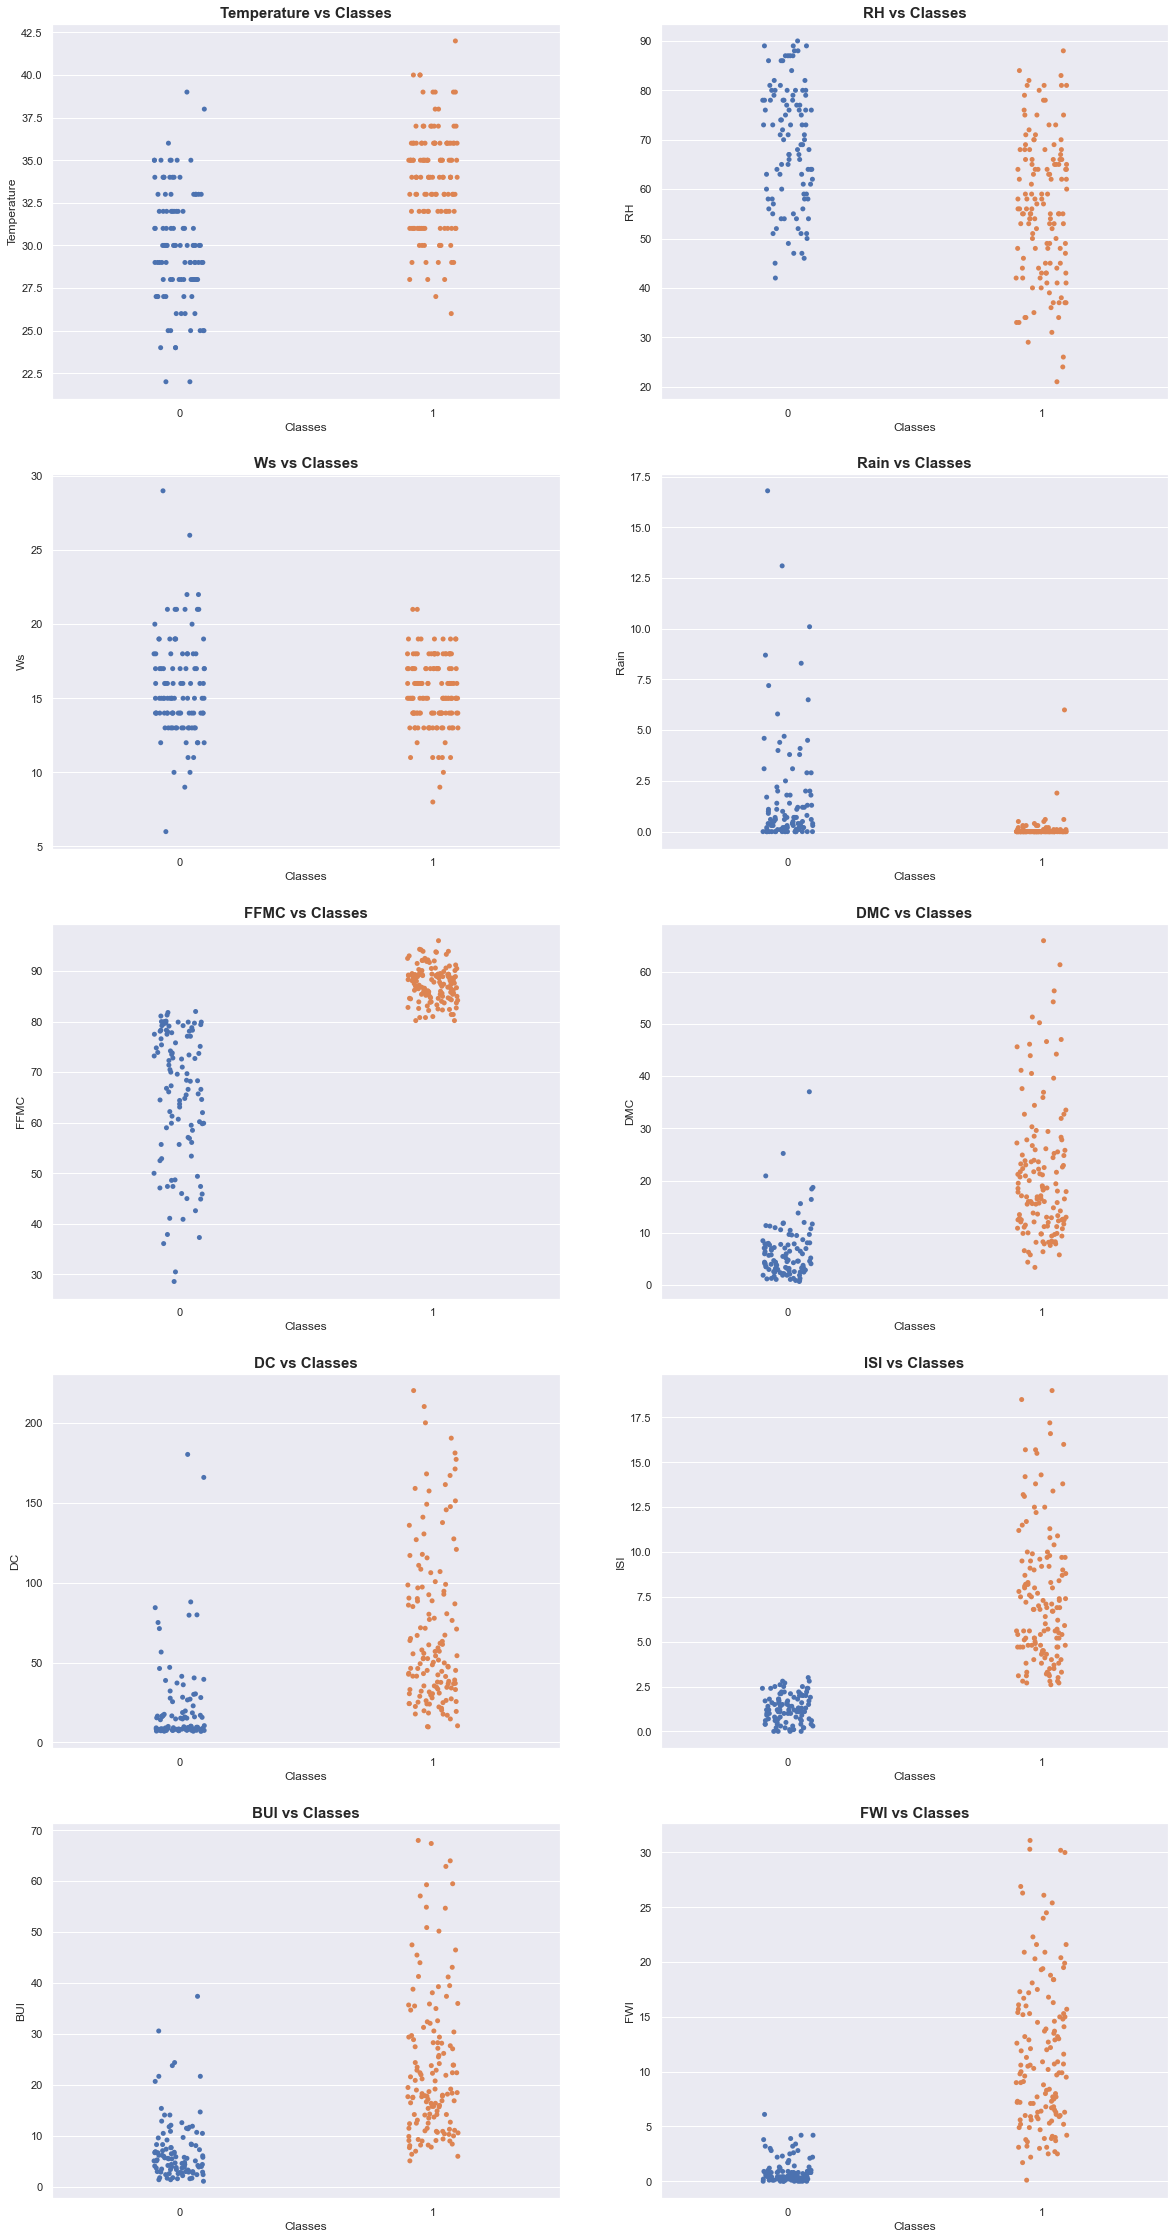

In [140]:
plt.figure(figsize=(20,40))
for feature in enumerate(Numerical_features_custom):
    plt.subplot(5,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,6)})
    sns.stripplot(data=data,y=feature[1],x='Classes')
    plt.title('{} vs Classes'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:green'> Observation </span>

1.It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.

2.For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.

3.Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.

4.For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.

5.DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

# <span style='color:red'> 4.2.2 Regplot Plot </span></span>

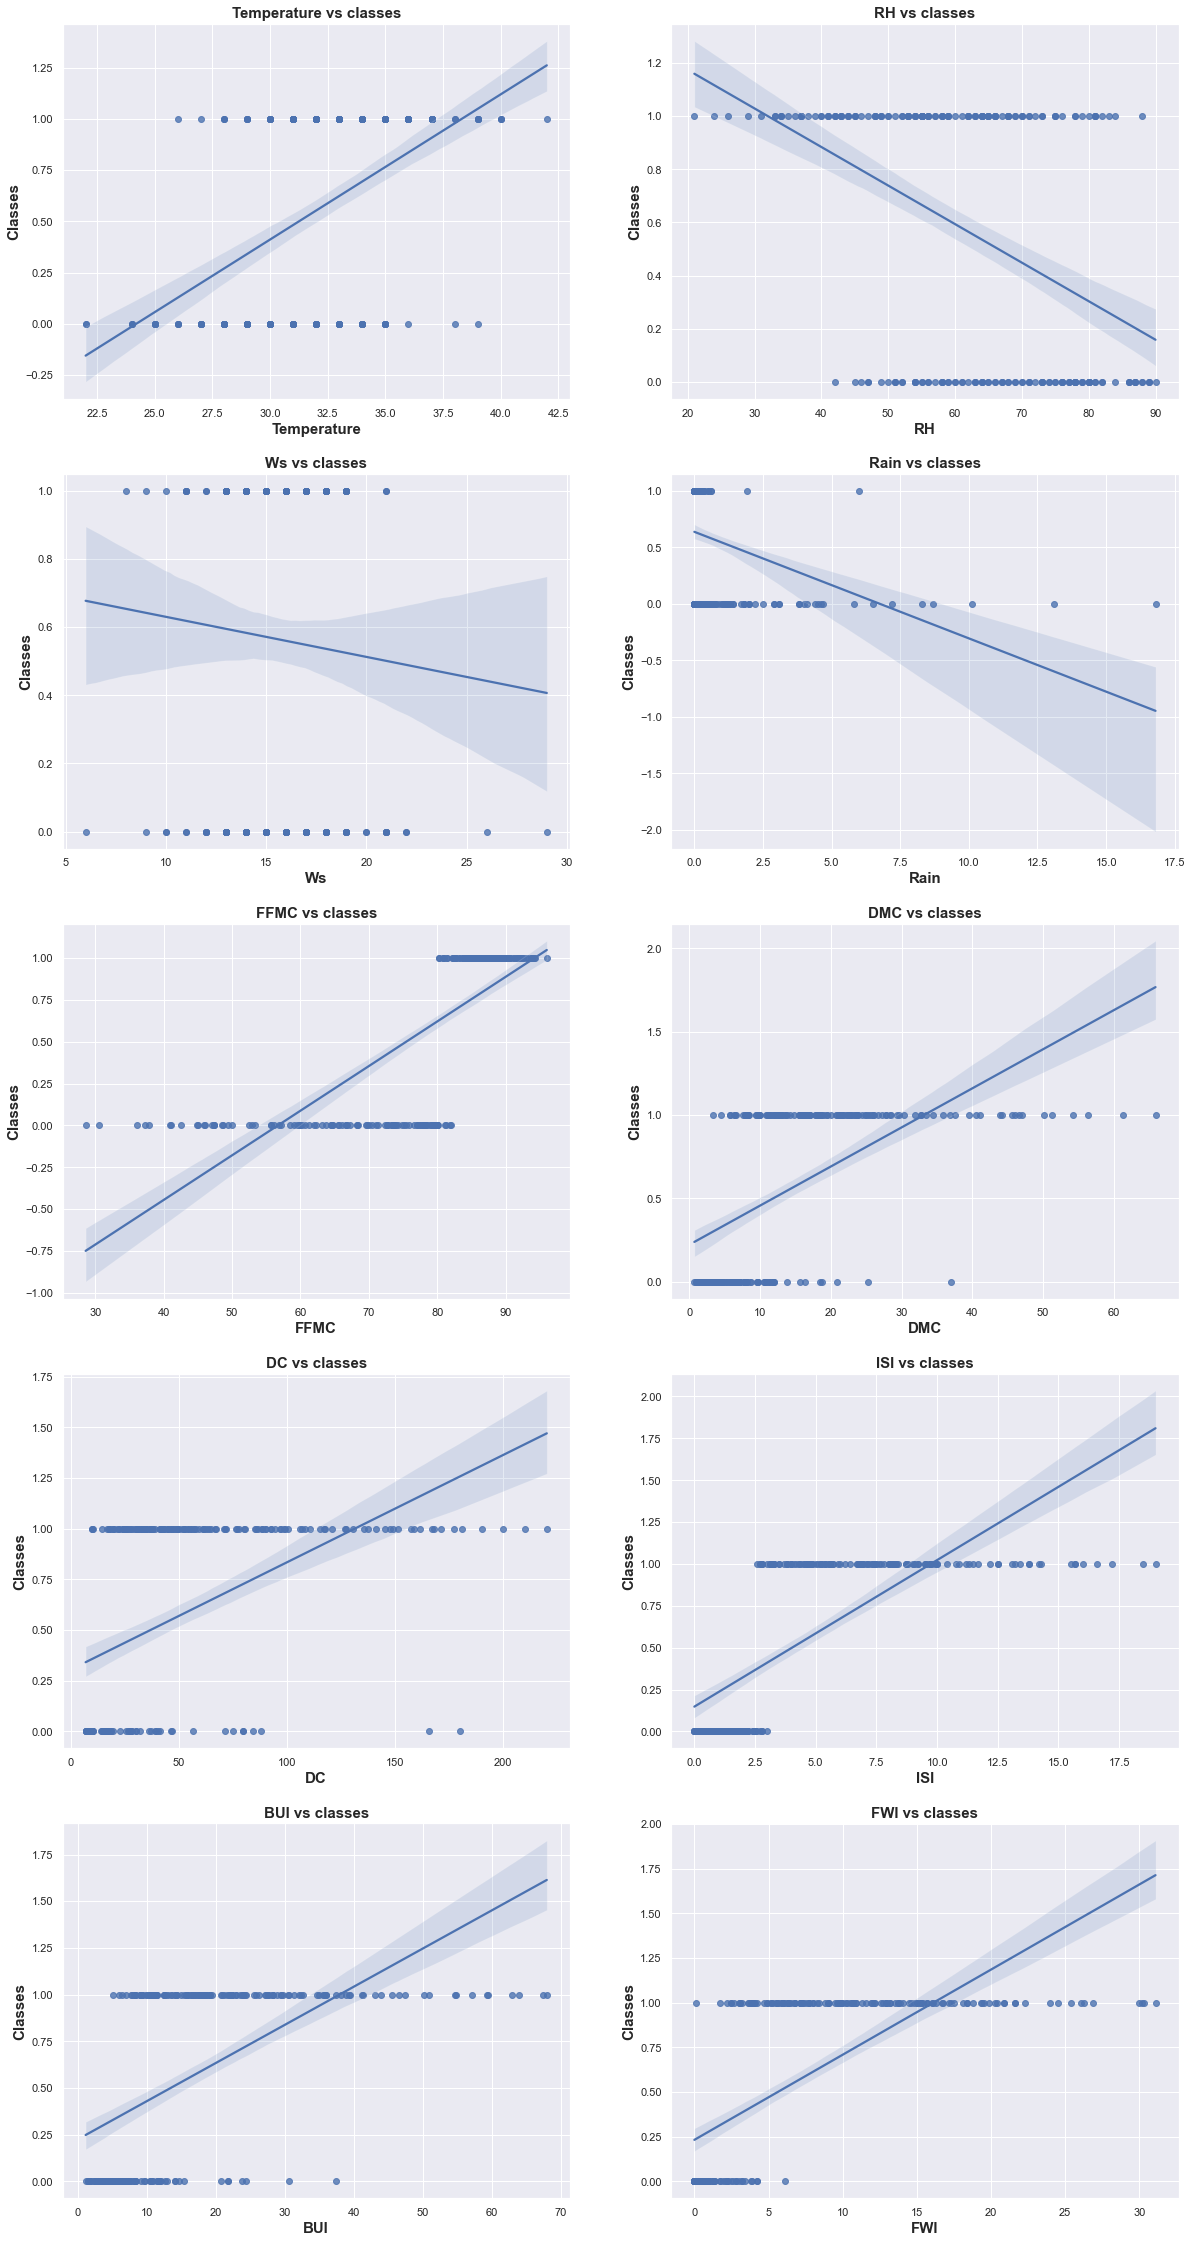

In [141]:
plt.figure(figsize=(20,40))
for feature in enumerate(Numerical_features_custom):
    plt.subplot(5,2,feature[0]+1)
    sns.set(rc={'figure.figsize':(7,6)})
    sns.regplot(data=data , x=feature[1],y='Classes')
    plt.xlabel('{}'.format(feature[1]),fontsize=15,fontweight='bold')
    plt.ylabel('Classes',fontsize=15,fontweight='bold')
    plt.title('{} vs classes'.format(feature[1]),fontsize=15,fontweight='bold')
plt.show();

# <span style='color:green'> Final Report </span>

1.Very highly Correlated features: DMC-BUI, DC-BUI, ISI-FWI

2.Highly correlated features: FFMC-ISI, DC-DMC, FWI-DMC, FWI-DC, FWI-BUI
    
3.Temperature between 30 to 37 degree celcius have most no of cases of occurance of fire.

4.Wind speed between 13 to 19 Km/hr range there is most no of occurance of fire.

5.Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.

6.For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.

7.DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

8.In Bejaia region, the no of cases of occurance of fire is less compared to no of cases of occurance of no fire.'
'
9.In Sidi Bel-abbes region the no of cases of occurance of fire is more compared to no fire.

10.Also Overall no of cases of occurance of fire is more in Sidi Bel-abbes region as compared to Bejaia region.

11.Most no of cases of fire occured are in the month of august and least no of cases of fire occured is in month of september.

12.July and august have more cases of fire as compared to no fire.

13.June and september have more cases of no fire as compared to fire.

14.Relative Humidity, RH feature doesnt have outliers whereas Temperature, FFMC, wind speed, Rain, DMC,DC, ISI, BUI and FWI have outilers.

15.There is no null vales in dataset.

# <span style='color:red'> 5.0 Model Building </span>

# <span style='color:red'> 5.1 Getting independent features in dataset(X) and dependent feature in series(y) </span>

In [142]:
### Creating copy of dataset
data=data.copy()

In [143]:
data.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [144]:
data['class']=data['Classes']

In [145]:
data.drop(['Classes'],axis=1,inplace=True)

In [146]:
data['Classes']=data['class']

In [147]:
data.drop(['class'],axis=1,inplace=True)

In [148]:
data.head(3)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0


In [149]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [150]:
X.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0


In [151]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classes, dtype: int64

# <span style='color:red'> 5.2 Splitting data into Training and Test data </span>

In [152]:
### random state train test split will be same with all people using random_state=16
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=16)

In [153]:
X_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
216,3,9,28,75,16,0.0,82.2,4.4,24.3,3.3,6.0,2.5,1.0
199,17,8,42,24,9,0.0,96.0,30.3,76.4,15.7,30.4,24.0,1.0
156,5,7,34,45,18,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
175,24,7,33,63,17,1.1,72.8,20.9,56.6,1.6,21.7,2.5,1.0
228,15,9,32,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1.0


In [154]:
y_train.head()

216    1
199    1
156    1
175    0
228    1
Name: Classes, dtype: int64

In [155]:
X_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
72,12,8,35,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,0.0
149,28,6,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,1.0
29,30,6,33,50,14,0.0,88.7,22.9,92.8,7.2,28.3,12.9,0.0
191,9,8,39,43,12,0.0,91.7,16.5,30.9,9.6,16.4,12.7,1.0
10,11,6,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,0.0


In [156]:
y_test.head()

72     0
149    1
29     1
191    1
10     1
Name: Classes, dtype: int64

In [157]:
### both will have same shape
(X_train.shape,y_train.shape)

((170, 13), (170,))

In [158]:
(X_test.shape,y_test.shape)

((74, 13), (74,))

# <span style='color:red'>  5.3 Standardisation/ Feature scaling the dataset </span>

In [159]:
### Creating a standard scaler object

scaler=StandardScaler()
scaler

StandardScaler()

In [160]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-1.46667507,  1.32918909, -1.20880747, ..., -0.74565569,
        -0.62033172,  0.95399809],
       [ 0.12870275,  0.44306303,  2.71075899, ...,  0.96241799,
         2.25514379,  0.95399809],
       [-1.23876395, -0.44306303,  0.47100673, ...,  0.14338266,
         1.05145637,  0.95399809],
       ...,
       [ 1.610125  ,  1.32918909, -2.04871457, ..., -0.99766657,
        -0.94131503, -1.04822013],
       [ 1.04034721,  1.32918909, -1.20880747, ..., -0.17863123,
        -0.5534602 ,  0.95399809],
       [ 0.24265831, -0.44306303,  0.19103769, ...,  0.50739836,
         0.26237239,  0.95399809]])

In [161]:
X_test= scaler.transform(X_test)
X_test

array([[-4.41075042e-01,  4.43063032e-01,  7.50975758e-01,
        -7.32557183e-01, -9.32937185e-01, -2.16223446e-01,
         2.27131581e-01,  6.22267177e-02,  5.59740154e-01,
        -5.58457335e-01,  2.83388695e-01, -3.92968541e-01,
        -1.04822013e+00],
       [ 1.38221389e+00, -1.32918909e+00,  1.31091382e+00,
        -1.64681313e+00, -9.32937185e-01, -3.58512423e-01,
         9.91597781e-01,  1.00182157e+00,  8.34900180e-02,
         1.54517290e+00,  7.31408021e-01,  1.50618273e+00,
         9.53998092e-01],
       [ 1.61012500e+00, -1.32918909e+00,  1.91037693e-01,
        -7.97861179e-01, -5.60638308e-01, -3.58512423e-01,
         7.32225321e-01,  6.53523476e-01,  9.31089379e-01,
         5.16223326e-01,  8.15411645e-01,  7.70595968e-01,
        -1.04822013e+00],
       [-7.82941717e-01,  4.43063032e-01,  1.87085189e+00,
        -1.25498915e+00, -1.30523606e+00, -3.58512423e-01,
         9.36993053e-01,  1.35126318e-01, -3.67583899e-01,
         1.06499643e+00, -1.76242897e

# <span style='color:red'> 6.0 Model </span>

# <span style='color:red'> 1.0 Logistic Regression </span>

In [162]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [163]:
log_reg.fit(X_train,y_train)

LogisticRegression()

# <span style='color:red'> 1.1 Using Above Model to get prediction for test data </span>

In [164]:
log_reg_pred=log_reg.predict(X_test)
log_reg_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

# <span style='color:red'> 1.2.0 Performance Metrics </span>

# <span style='color:blue'> 1.2.1 Confusion Matrix </span>

In [165]:
confusion_matrix= confusion_matrix(y_test,log_reg_pred)
confusion_matrix

array([[34,  2],
       [ 1, 37]], dtype=int64)

In [166]:
trutly_positive=confusion_matrix[0,0]
falsely_positive=confusion_matrix[0,1]
falsely_negative=confusion_matrix[1,0]
trutly_negative= confusion_matrix[1,1]

# <span style='color:blue'> 1.2.2 Accuracy Score </span>

In [167]:
### accuracy using accuracy_score
accuracy= accuracy_score(y_test,log_reg_pred)
accuracy

0.9594594594594594

In [168]:
manual_accuracy_score=round(((trutly_positive+trutly_negative)/(trutly_positive+trutly_negative+falsely_negative+falsely_positive)),4)
manual_accuracy_score

0.9595

# <span style='color:red'> 1.2.3 Precision Score </span>

In [169]:
precision_score_manual=round(((trutly_positive)/(trutly_positive+falsely_positive)),4)
print('precision score of our model is {}'.format(precision_score_manual))

precision score of our model is 0.9444


# <span style='color:red'> 1.2.4 Recall Score </span>

In [170]:
recall_score_manual = round(((trutly_positive)/(trutly_positive+falsely_negative)),4)
print('recall score of our model is {}'.format(recall_score_manual))

recall score of our model is 0.9714


# <span style='color:red'> 1.2.5 F-1 Score </span>

Giving equal importance to falsely positive and falsely negative

In [171]:
F1_score_manual= 2*(precision_score_manual*recall_score_manual)/(precision_score_manual+recall_score_manual)
print('F1 score of our model is {}'.format(F1_score_manual))

F1 score of our model is 0.9577097400563734


# <span style='color:red'> 1.2.6 Classification Report </span>

In [172]:
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.95      0.97      0.96        38

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74



# <span style='color:red'> 7.0 Saving the Model </span>

In [173]:
import pickle

In [174]:
filename='model_Logistic_regression_algerian_forest'
pickle.dump(log_reg,open(filename,'wb'))

In [178]:
with open('model_Logistic_regression_algerian_forest', 'wb') as to_write:
    pickle.dump(log_reg, to_write)